# Pymaceuticals Inc.
---

### Analysis

- There appears to be a direct correlation between the Mouse's weight, Metastatic sites, tumor volume, and timepoint. It appears that larger mice with more metastatic sites have tumors that are more in volume - which seems to require a higher timepoint. 
 

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_results = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
data_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [66]:
# Checking the number of mice.
data_results['Mouse ID'].nunique()

249

In [67]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_results['Mouse ID'].value_counts()



g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [68]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_index = data_results.set_index("Mouse ID")
duplicate_index.loc['g989']

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [69]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = duplicate_index.drop(['g989'])
clean_data.head()




,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
b128,5,45.651331,0,Capomulin,Female,9,22
b128,10,43.270852,0,Capomulin,Female,9,22
b128,15,43.784893,0,Capomulin,Female,9,22
b128,20,42.731552,0,Capomulin,Female,9,22


In [70]:
#  Reset Mouse ID as Index
#  Checking the number of mice in the clean DataFrame.
clean_df = clean_data.reset_index()
clean_df["Mouse ID"].nunique()


248

In [71]:
clean_df['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

## Summary Statistics

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_summary = clean_df.groupby(['Drug Regimen'])

tumor_mean = tumor_summary['Tumor Volume (mm3)'].mean()
tumor_median = tumor_summary['Tumor Volume (mm3)'].median()
tumor_variance = tumor_summary['Tumor Volume (mm3)'].var()
tumor_stddev = tumor_summary['Tumor Volume (mm3)'].std()
tumor_SEM = tumor_summary['Tumor Volume (mm3)'].sem()

 
# Assemble the resulting series into a single summary DataFrame.
tumor_summary_df = pd.DataFrame({"Mean": tumor_mean,
                               "Median": tumor_median,
                               "Variance": tumor_variance,
                               "Standard Deviation": tumor_stddev,
                               "SEM": tumor_SEM
                                })
tumor_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [73]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_tumor_df = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_tumor_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

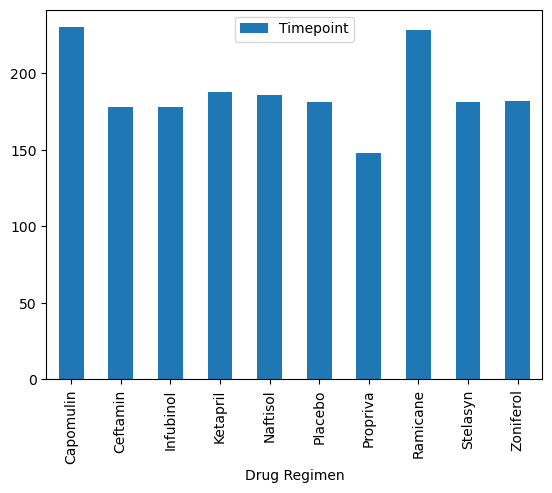

In [74]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar = clean_df.groupby(["Drug Regimen"]).count()


pandas_bar.plot(y= "Timepoint", kind="bar")


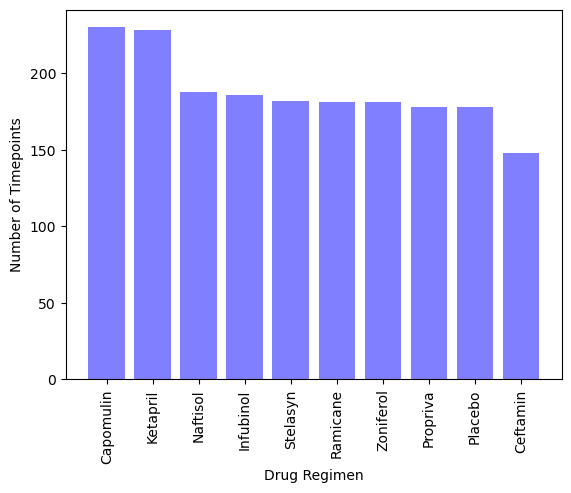

In [75]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = ['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn', 'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin']
rows = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]

plt.bar(x_axis, rows, color="blue", alpha=0.5, align="center", )
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.show()



In [76]:
#Identify how many female vs. males mice
clean_df['Sex'].value_counts()

Male      958
Female    922
Name: Sex, dtype: int64

<Axes: ylabel='Sex'>

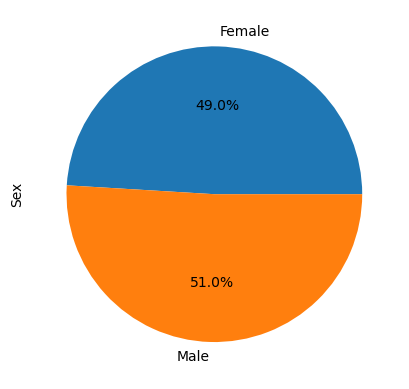

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_pie = clean_df.groupby(["Sex"])["Sex"].count()
sex_pie.plot(kind="pie",autopct='%1.1f%%')


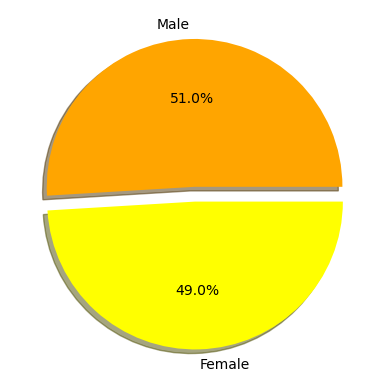

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
colors = ['orange', 'yellow']
sizes = [958, 922]
explode = (0.05, 0.05)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)
plt.show()

## Quartiles, Outliers and Boxplots

In [79]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse & putting that into a DataFrame
last_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_merged_df = pd.merge(clean_df, last_timepoint_df, on=('Mouse ID', 'Timepoint'), how='right')
last_merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [86]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
cap_tumor_vol = []
ram_tumor_vol = []
inf_tumor_vol = []
cef_tumor_vol = []


    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_merged_df.iterrows():
    if row['Drug Regimen'] == drug_treatment[0]:
        cap_tumor_vol.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == drug_treatment[1]:
        ram_tumor_vol.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == drug_treatment[2]:
        inf_tumor_vol.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == drug_treatment[3]:
        cef_tumor_vol.append(row['Tumor Volume (mm3)'])

    
    # add subset 
drug_treatment_df = pd.DataFrame({'Capomulin': cap_tumor_vol,
                                    'Ramicane': ram_tumor_vol,
                                    'Infubinol': inf_tumor_vol,
                                    'Ceftamin': cef_tumor_vol})
drug_treatment_df

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = last_merged_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq - (1.5 * iqr)

print(lower_bound)
print(upper_bound)

drug_treatment_df

17.10923096124998
36.28698821875


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


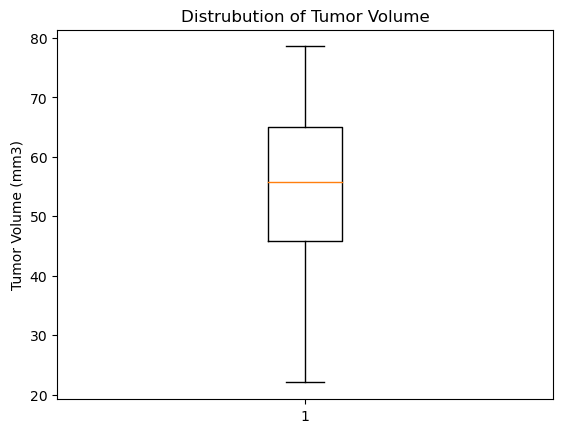

In [87]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Distrubution of Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(last_merged_df['Tumor Volume (mm3)'])
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
